<a href="https://colab.research.google.com/github/ichowdhury10/ML_Clustering_Project/blob/main/Heart_Failure_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
from scipy import stats
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/heart_failure.csv')
data = df

data_head = data.head()

data_info = data.info()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


DATA PREPROCESSING

In [ ]:
missing_values = data.isnull().sum()

missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# numerical columns (exclude categorical & binary ones)
numerical_data = df.select_dtypes(include=['int64', 'float64'])
non_binary_numerical_data = numerical_data.loc[:, numerical_data.nunique() > 2]

# Standardize the data
scaler = StandardScaler()
data_encoded = scaler.fit_transform(non_binary_numerical_data)


non_binary_numerical_data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


# **Principal Component Analysis:**

In [ ]:
from sklearn.decomposition import PCA


# Perform PCA to reduce the data to five principal components
pca = PCA(n_components=5)
pca.fit(data_encoded)

# explained variance ratio for the first five principal components
explained_variance_ratio = pca.explained_variance_ratio_

# variance for each principal component
explained_variance_labels = [f'PCA {i+1}' for i in range(5)]
for i, variance in enumerate(explained_variance_ratio):
    print(f"{explained_variance_labels[i]}: {variance:.3f}")




PCA 1: 0.341
PCA 2: 0.239
PCA 3: 0.166
PCA 4: 0.138
PCA 5: 0.115


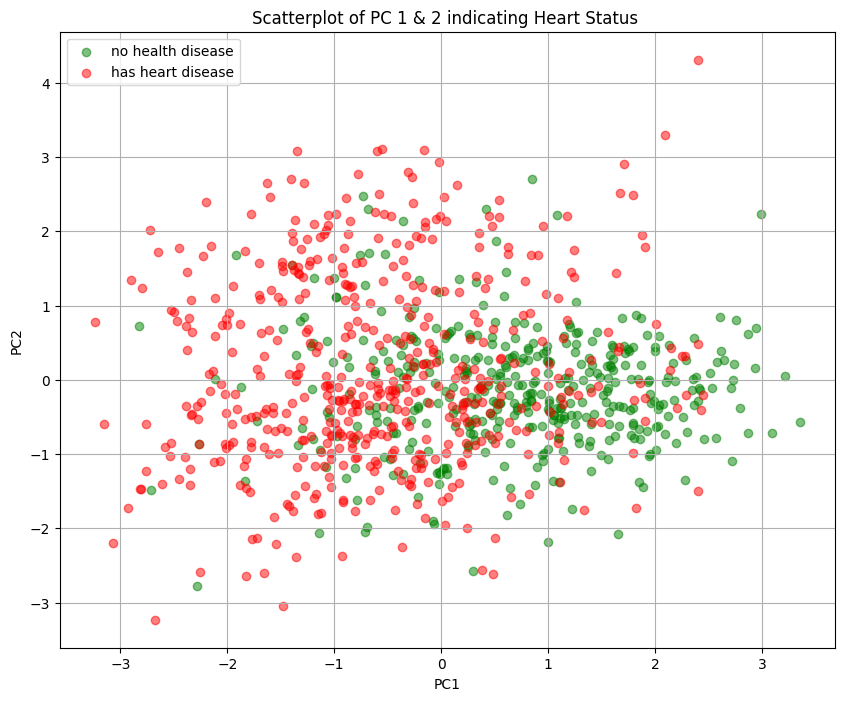

In [ ]:
principal_components = pca.fit_transform(data_encoded)


plt.figure(figsize=(10, 8))

# patients without heart disease
plt.scatter(principal_components[data['HeartDisease'] == 0, 0],  # PC1
            principal_components[data['HeartDisease'] == 0, 1],  # PC2
            alpha=0.5, label='no health disease', color='green')

# patients with heart disease
plt.scatter(principal_components[data['HeartDisease'] == 1, 0], # PC1
            principal_components[data['HeartDisease'] == 1, 1], # PC2
            alpha=0.5, label='has heart disease', color='red')

plt.title('Scatterplot of PC 1 & 2 indicating Heart Status ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# **K-Means Clustering**

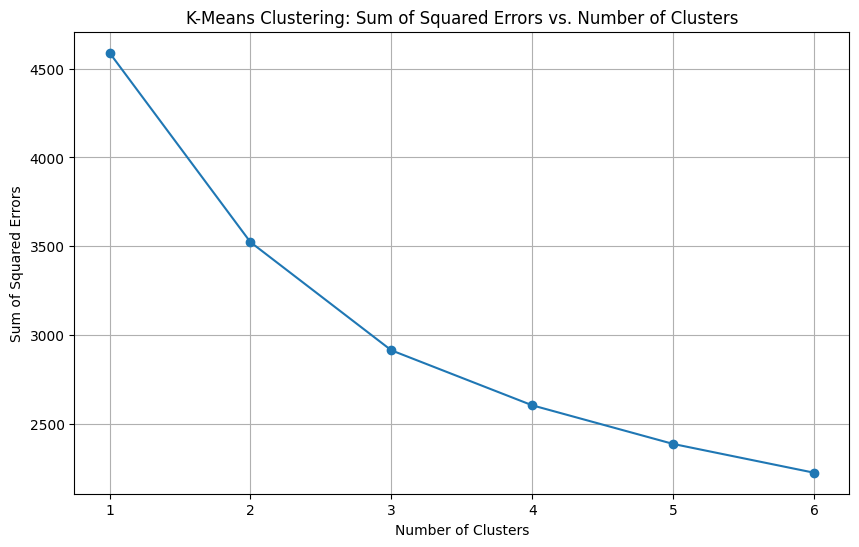

In [ ]:
from sklearn.cluster import KMeans

# Elbow Method for K-Means clustering
sse = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_encoded)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,7), sse, marker='o')
plt.title('K-Means Clustering: Sum of Squared Errors vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


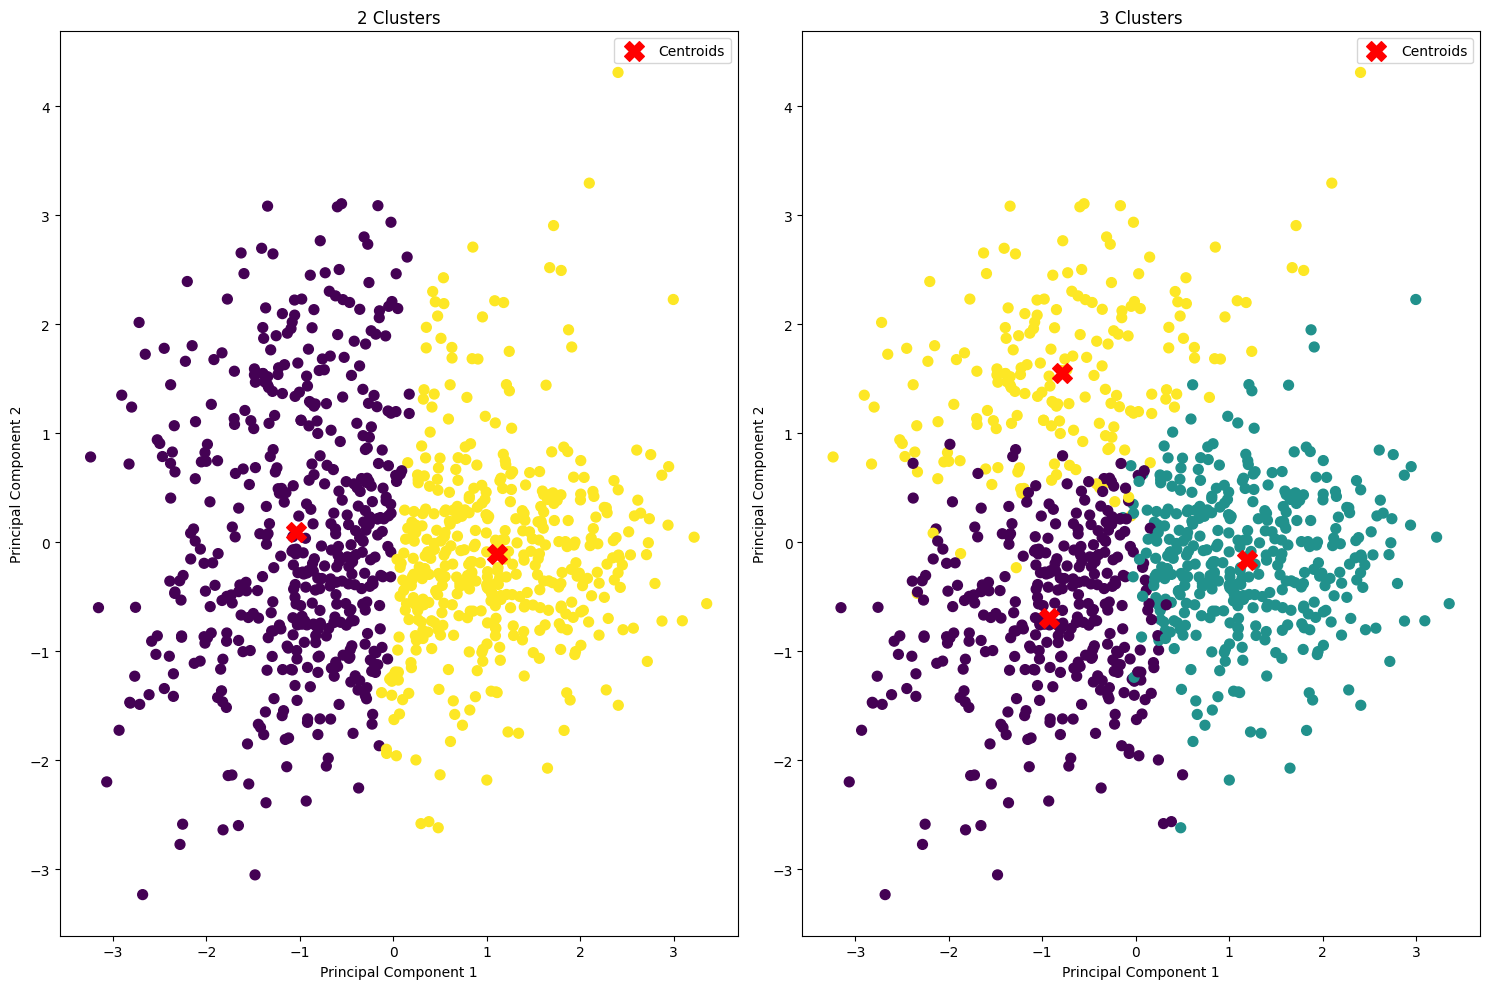

In [ ]:
# We will create subplots to show 2 and 3 clusters as per the modified request
plt.figure(figsize=(15, 10))

# Plot for 2 clusters using k-means
plt.subplot(1, 2, 1)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels_2 = kmeans.fit_predict(data_encoded)
pca_2 = PCA(n_components=2)
principal_components_2 = pca_2.fit_transform(data_encoded)
plt.scatter(principal_components_2[:, 0], principal_components_2[:, 1], c=cluster_labels_2, cmap='viridis', s=50)
centroids_pca_2 = pca_2.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca_2[:, 0], centroids_pca_2[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot for 3 clusters using k-means
plt.subplot(1, 2, 2)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_3 = kmeans.fit_predict(data_encoded)
pca_3 = PCA(n_components=2)
principal_components_3 = pca_3.fit_transform(data_encoded)
plt.scatter(principal_components_3[:, 0], principal_components_3[:, 1], c=cluster_labels_3, cmap='viridis', s=50)
centroids_pca_3 = pca_3.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca_3[:, 0], centroids_pca_3[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

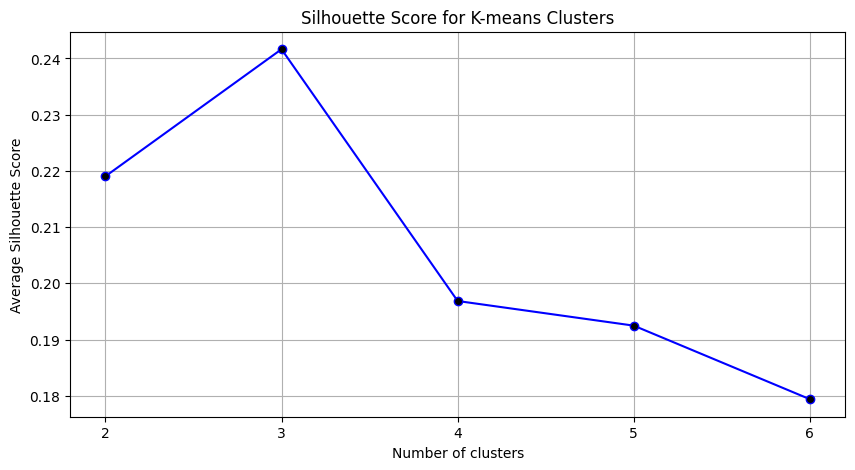

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = np.zeros(6)

# computing silouette scores for 2-6 clusers
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_encoded)
    labels = kmeans.labels_
    sil_score[k-1] = silhouette_score(data_encoded, labels)

# Silhouette score plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(2, 7), sil_score[1:], 'bo-', markerfacecolor='black', color='blue')
plt.title('Silhouette Score for K-means Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(np.arange(2, 7))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

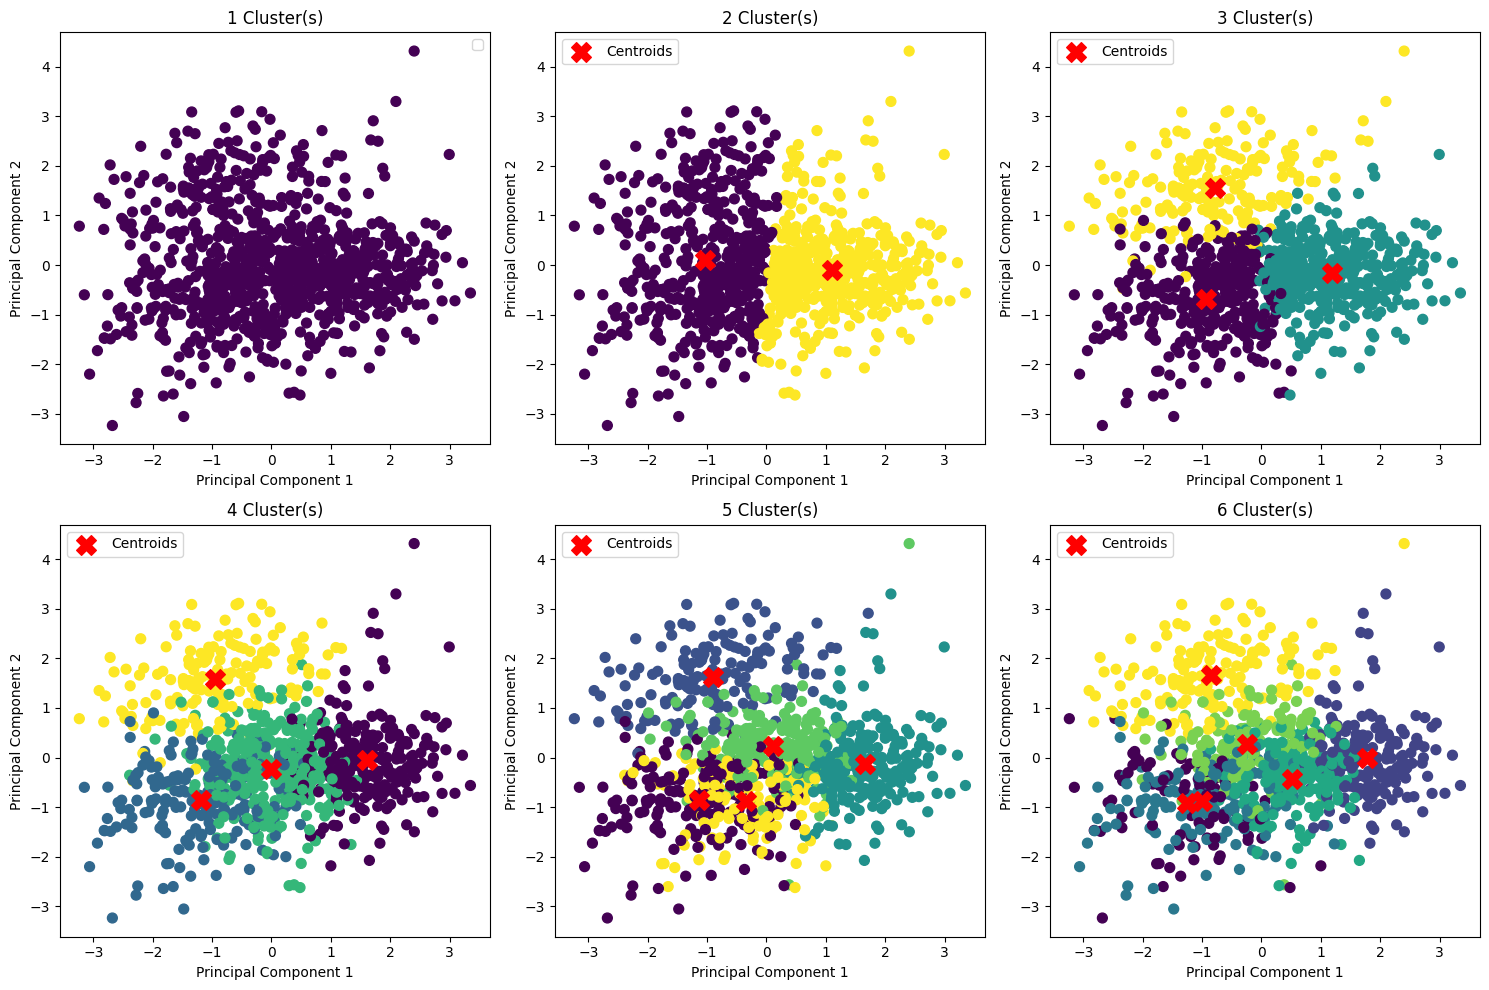

In [ ]:
n_clusters = 6
plt.figure(figsize=(15, 10))

# creating subplots to show clusters from 1 to 6
for k in range(1, n_clusters + 1):
    plt.subplot(2, 3, k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_encoded)

    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_encoded)

    # plot the clusters
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', s=50)

    # plot the centroids if more than one cluster is present
    if k > 1:
        centroids = kmeans.cluster_centers_
        centroids_pca = pca.transform(centroids)
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

    plt.title(f'{k} Cluster(s)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()

# **Gaussian Mixture Model Clustering**

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=1, random_state=42)
gmm.fit(data_encoded)

log_likelihood = gmm.score(data_encoded)

print(f"The log-likelihood of 1 Cluster  is:{log_likelihood}")

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_encoded)

log_likelihood = gmm.score(data_encoded)

print(f"The log-likelihood of 2 Clusters is:{log_likelihood}")

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_encoded)

log_likelihood = gmm.score(data_encoded)

print(f"The log-likelihood of 3 Clusters is:{log_likelihood}")

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(data_encoded)

log_likelihood = gmm.score(data_encoded)

print(f"The log-likelihood of 4 Clusters is:{log_likelihood}")

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_encoded)

log_likelihood = gmm.score(data_encoded)

print(f"The log-likelihood of 5 Clusters is:{log_likelihood}")

gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(data_encoded)

log_likelihood = gmm.score(data_encoded)

print(f"The log-likelihood of 6 Clusters is:{log_likelihood}")


The log-likelihood of 1 Cluster  is:-6.898179187245888
The log-likelihood of 2 Clusters is:-4.512180882090397
The log-likelihood of 3 Clusters is:-3.3666417094043792
The log-likelihood of 4 Clusters is:-3.320493197585147
The log-likelihood of 5 Clusters is:-3.276189210818018
The log-likelihood of 6 Clusters is:-3.230013665178746


<ipython-input-13-115a05c2629c>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 7), bic_scores, 'bo-', markerfacecolor='b', color='blue')


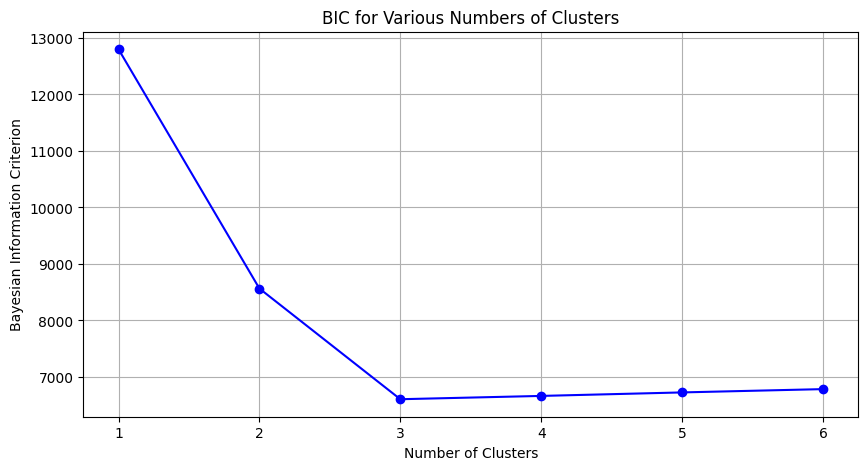

<ipython-input-13-115a05c2629c>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2, 7), silhouette_scores, 'bo-', markerfacecolor='b', color='blue')


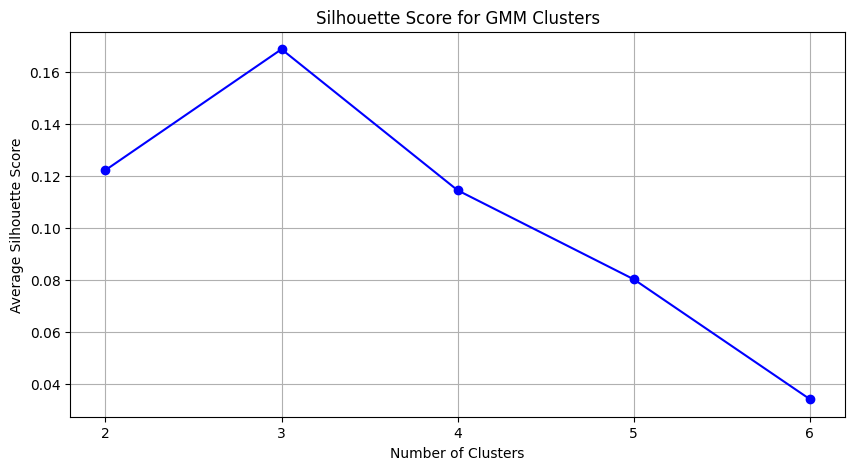

In [ ]:
bic_scores = []
silhouette_scores = []

# Calculate BIC and silhouette scores for different numbers of clusters
for k in range(1, 7):
    # Initialize GaussianMixture with k components
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_encoded)
    bic_scores.append(gmm.bic(data_encoded))

    # Silhouette scores can't be computed for a single cluster, so we start from 2
    if k > 1:
        labels = gmm.predict(data_encoded)
        silhouette_scores.append(silhouette_score(data_encoded, labels))

# Plotting BIC scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 7), bic_scores, 'bo-', markerfacecolor='b', color='blue')
plt.title('BIC for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Bayesian Information Criterion')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), silhouette_scores, 'bo-', markerfacecolor='b', color='blue')
plt.title('Silhouette Score for GMM Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(2, 7))
plt.grid(True)
plt.show()

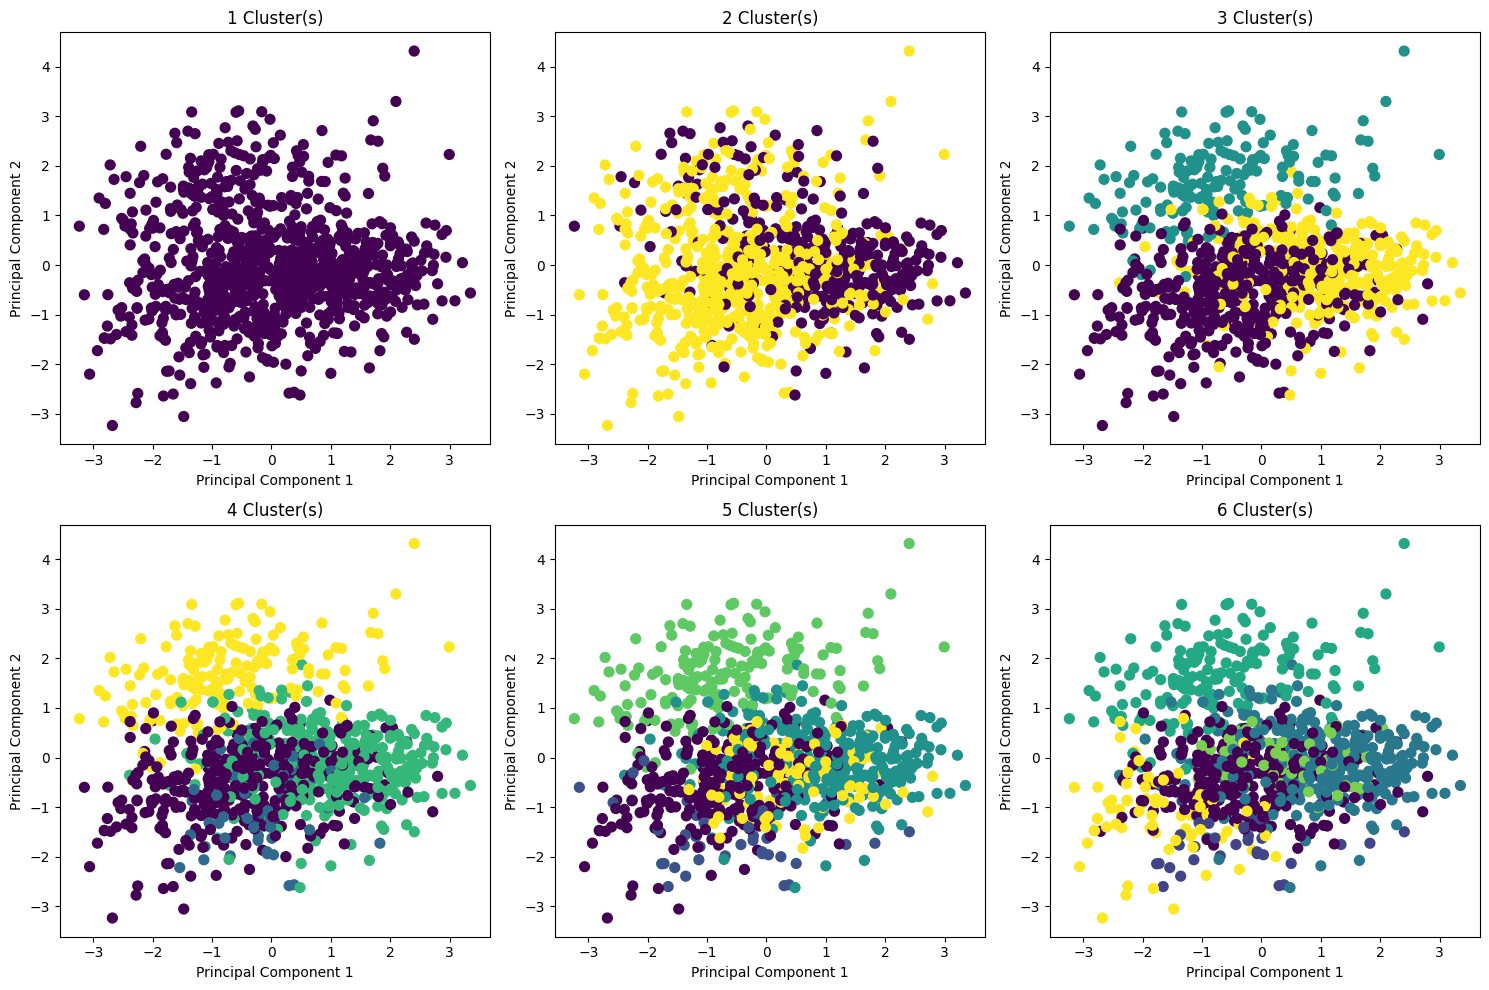

In [ ]:
n_clusters = 6

plt.figure(figsize=(15, 10))

# Creating subplots for GMM clusters from 1 to 6
for k in range(1, n_clusters + 1):
    plt.subplot(2, 3, k)
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(data_encoded)

    # Plot the clusters
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=gmm_labels, cmap='viridis', s=50)

    plt.title(f'{k} Cluster(s)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


Total contribution of each cluster for 1 components:
Cluster 1: 1.0000

Total contribution of each cluster for 2 components:
Cluster 1: 0.3089
Cluster 2: 0.6911

Total contribution of each cluster for 3 components:
Cluster 1: 0.5862
Cluster 2: 0.0941
Cluster 3: 0.3197

Total contribution of each cluster for 4 components:
Cluster 1: 0.4804
Cluster 2: 0.0215
Cluster 3: 0.3848
Cluster 4: 0.1133

Total contribution of each cluster for 5 components:
Cluster 1: 0.3510
Cluster 2: 0.0139
Cluster 3: 0.4514
Cluster 4: 0.1361
Cluster 5: 0.0476

Total contribution of each cluster for 6 components:
Cluster 1: 0.3085
Cluster 2: 0.0072
Cluster 3: 0.4821
Cluster 4: 0.1454
Cluster 5: 0.0110
Cluster 6: 0.0458



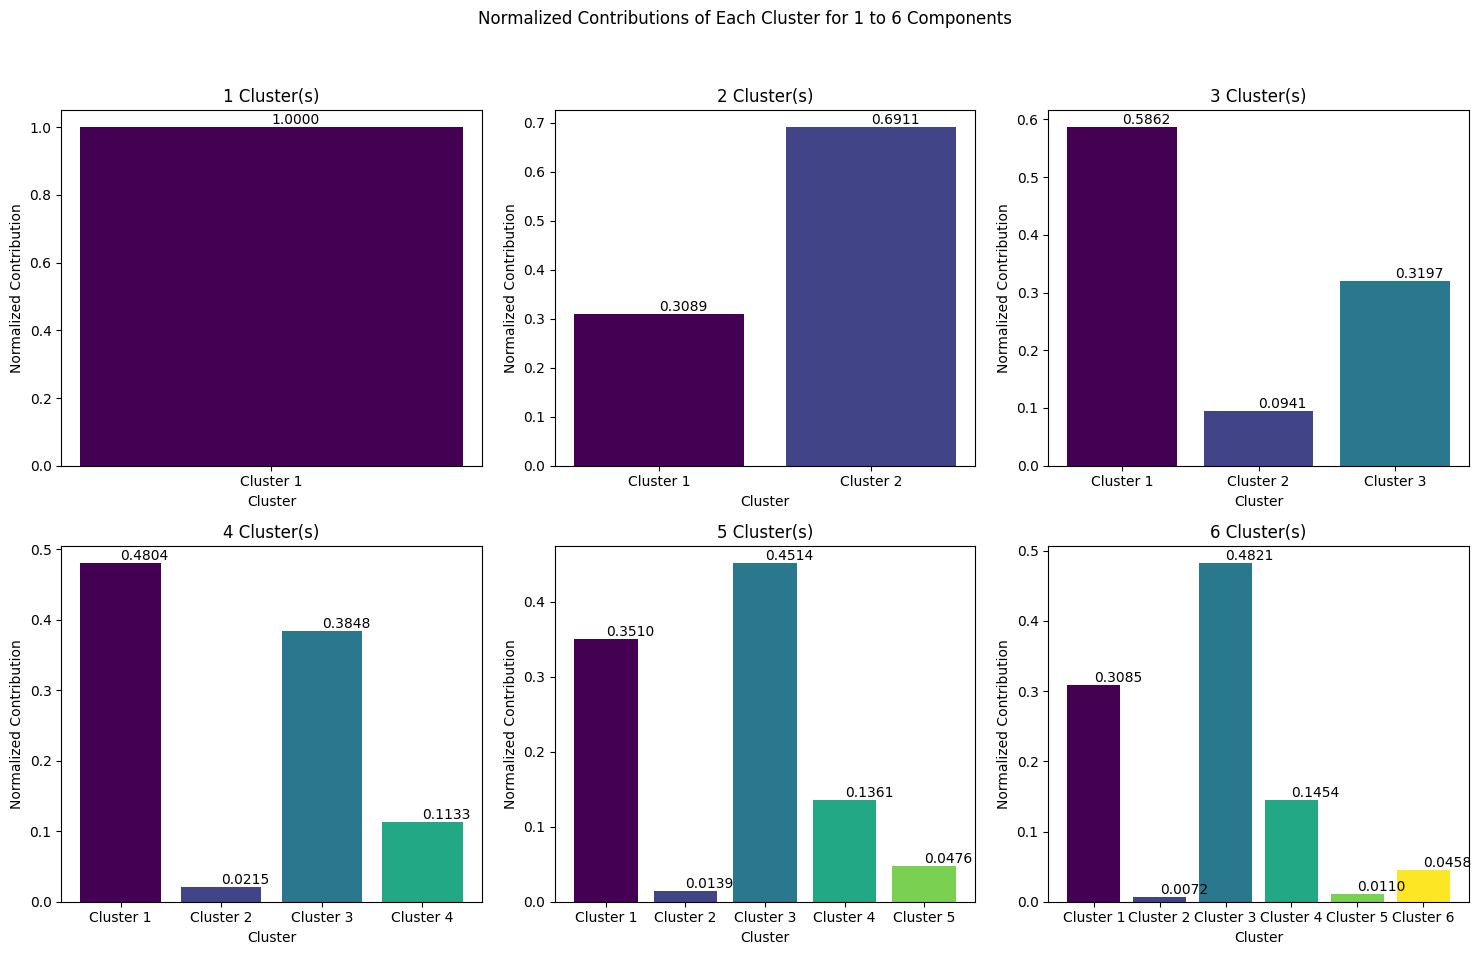

In [ ]:
cluster_contribution_data = []

# Calculate normalized contributions for 1 to 6 clusters
for n_clusters in range(1, 7):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data_encoded)

    responsibilities = gmm.predict_proba(data_encoded)
    weighted_contributions = responsibilities * gmm.weights_
    total_contributions = np.sum(weighted_contributions, axis=0)

    normalized_contributions = total_contributions / np.sum(total_contributions)
    cluster_contribution_data.append(normalized_contributions)

    # Display the normalized contributions of each cluster
    print(f"Total contribution of each cluster for {n_clusters} components:")
    for i, contribution in enumerate(normalized_contributions, start=1):
        print(f"Cluster {i}: {contribution:.4f}")
    print()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Normalized Contributions of Each Cluster for 1 to 6 Components')

colors = plt.cm.viridis(np.linspace(0, 1, 6))

for idx, ax in enumerate(axes.flatten()):
    contributions = cluster_contribution_data[idx]
    num_components = idx + 1
    bars = ax.bar(range(1, num_components + 1), contributions, color=colors[:num_components])

    ax.set_title(f'{num_components} Cluster(s)')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Normalized Contribution')
    ax.set_xticks(range(1, num_components + 1))
    ax.set_xticklabels([f'Cluster {i}' for i in range(1, num_components + 1)])

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Sources:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
https://www.geeksforgeeks.org/clustering-in-machine-learning/#uses-of-clustering
https://developers.google.com/machine-learning/clustering/clustering-algorithms
https://www.udemy.com/share/103adN3@K5TqPJfWAHPWicjLQmsP5zjjI0WYJIXrw-kKDe-OXIzXKlaxFepb8bTSUKh0oR8RwQ==/
https://builtin.com/articles/gaussian-mixture-model
https://www.geeksforgeeks.org/ml-expectation-maximization-algorithm/
https://www.geeksforgeeks.org/k-means-clustering-introduction/

Dataset from: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data
